<a href="https://colab.research.google.com/github/neha-rapolu001/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

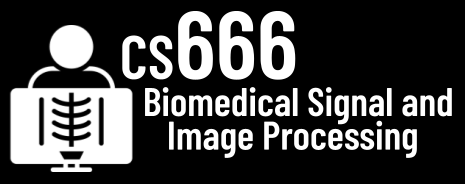
#Assignment 5

In [2]:
# NAME: NEHA RAPOLU

In [3]:
# In this assignment, we will visualize and explore a CT scan!

In [4]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [6]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [7]:
# TODO: YOUR CODE
!wget https://cs666.org/data/ct.zip

--2024-04-15 23:45:13--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip.1’

ct.zip.1            100%[===================>]   5.58M  --.-KB/s    in 0.08s   

2024-04-15 23:45:13 (66.8 MB/s) - ‘ct.zip.1’ saved [5847706/5847706]



In [8]:
# Then use the following snippet to extract the data.

In [9]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [10]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [11]:
# TODO: 220 slices

In [12]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [13]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

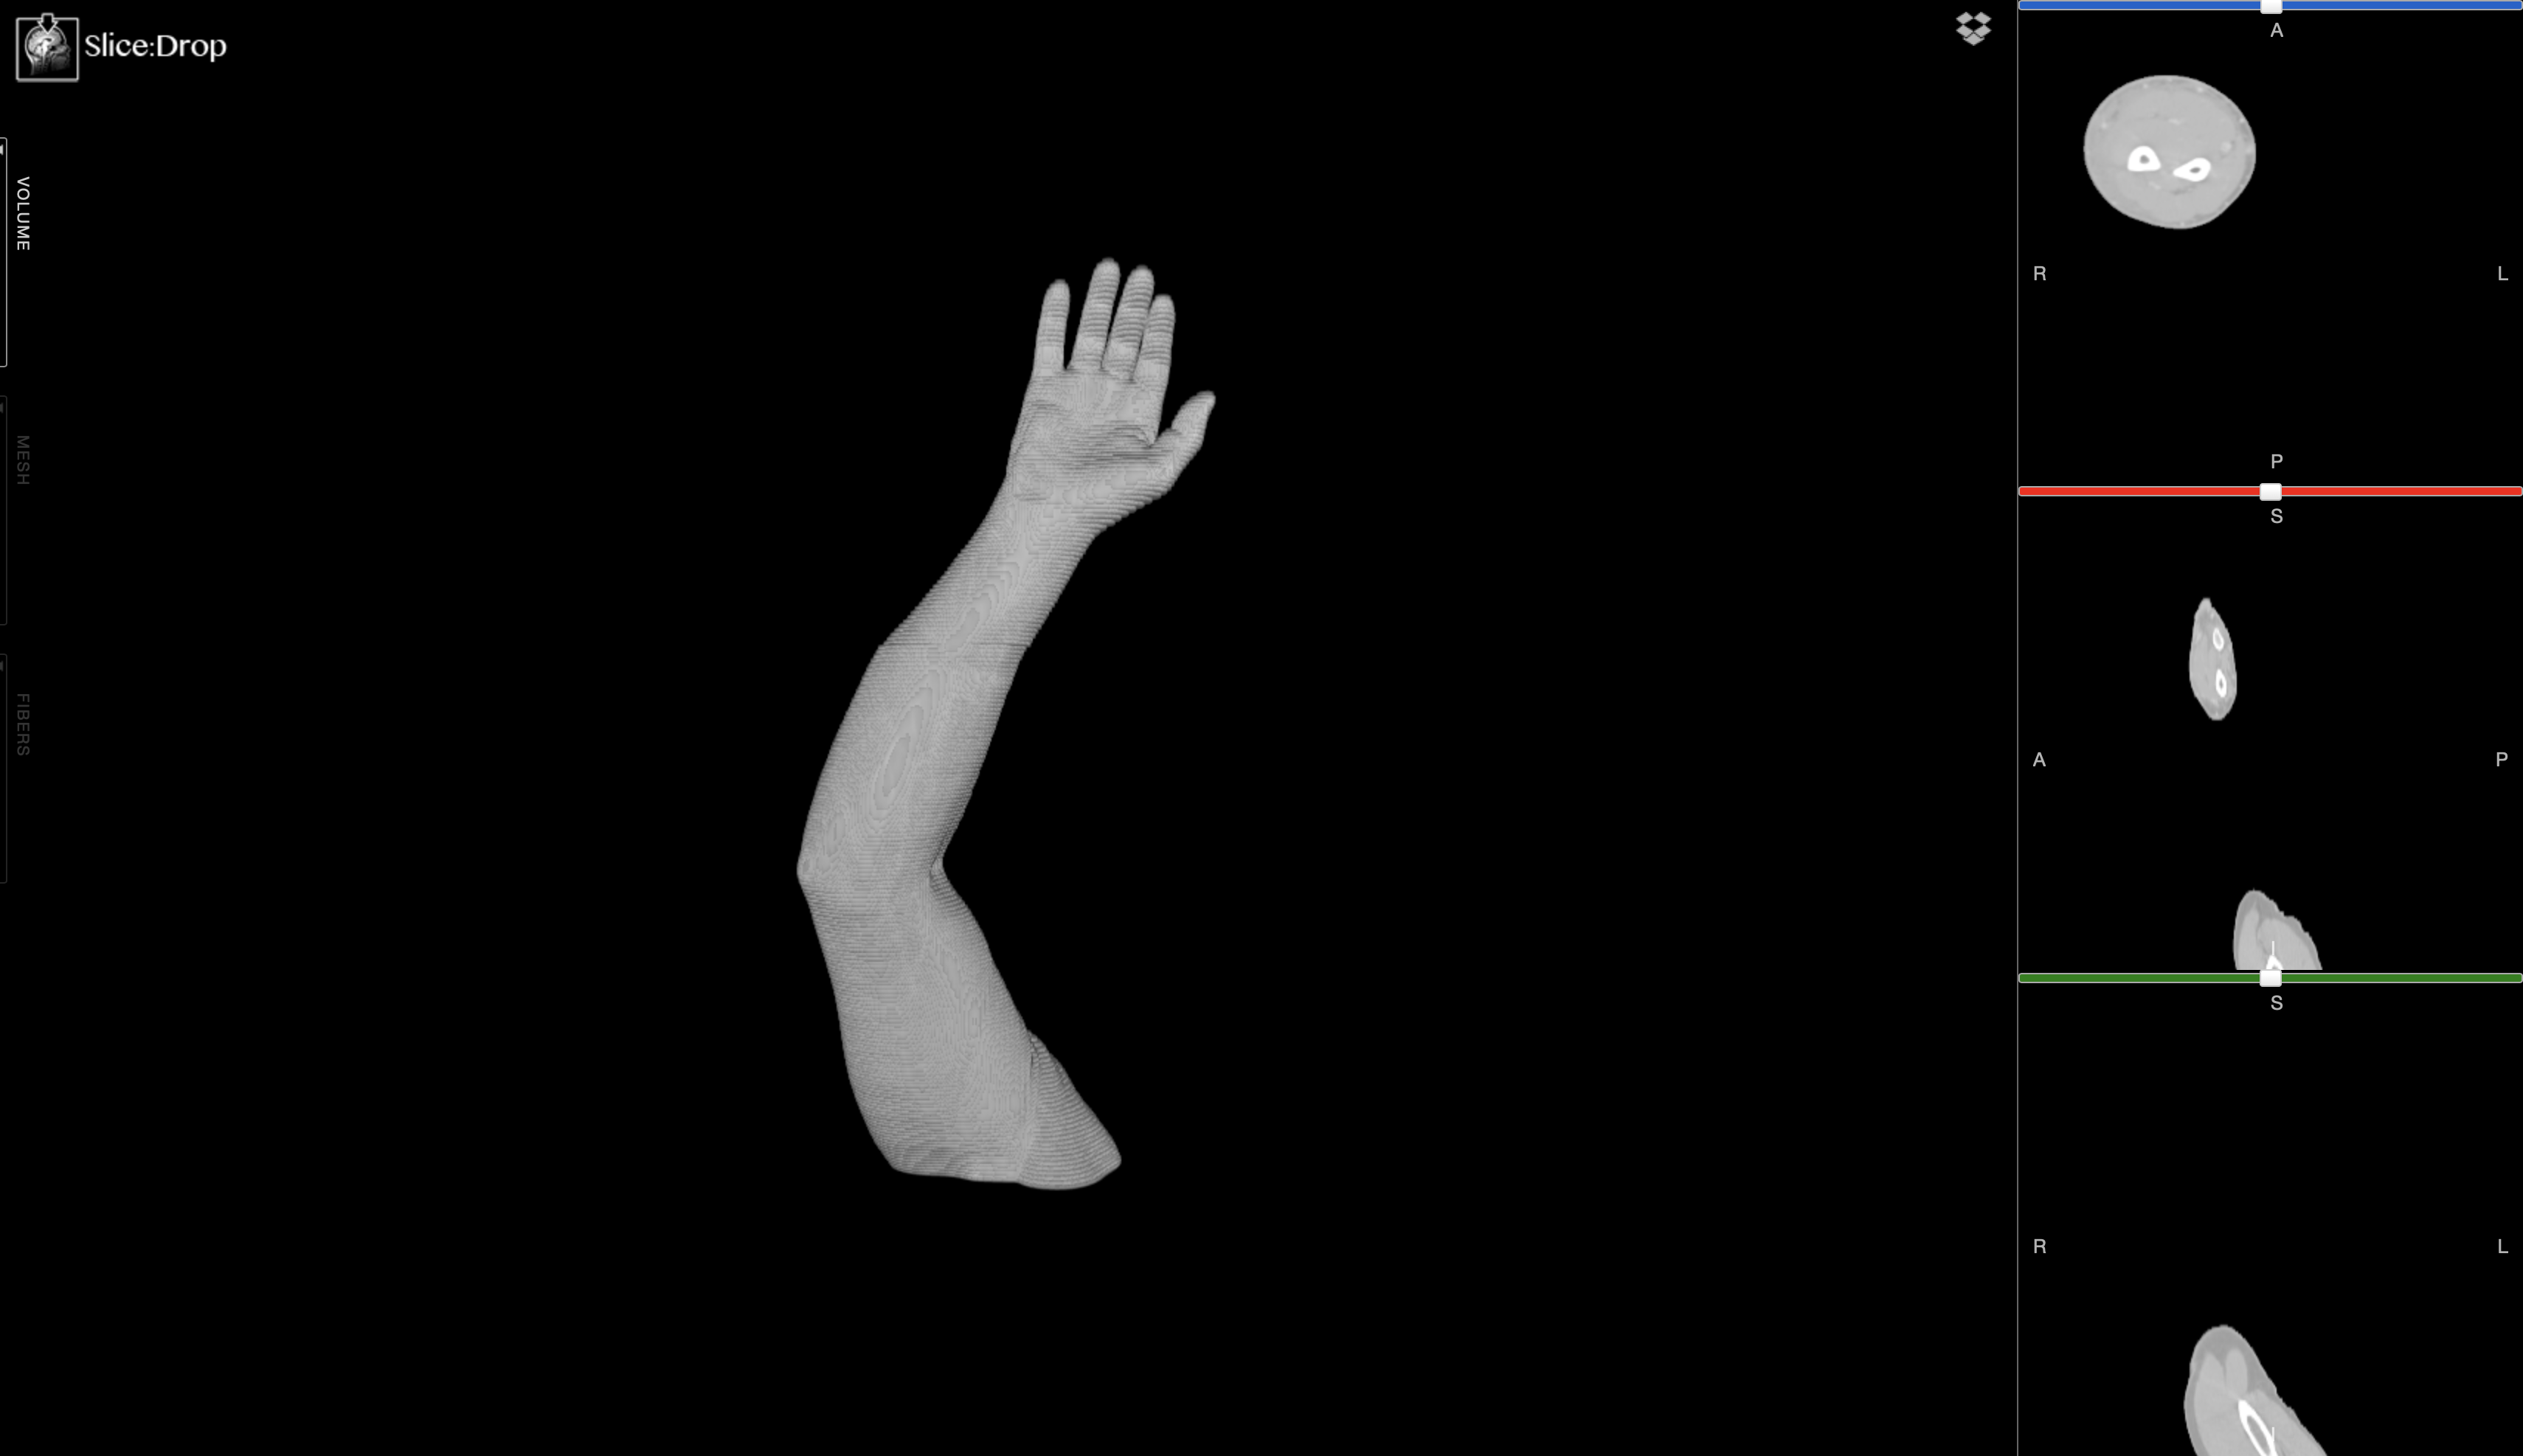

In [14]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [15]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

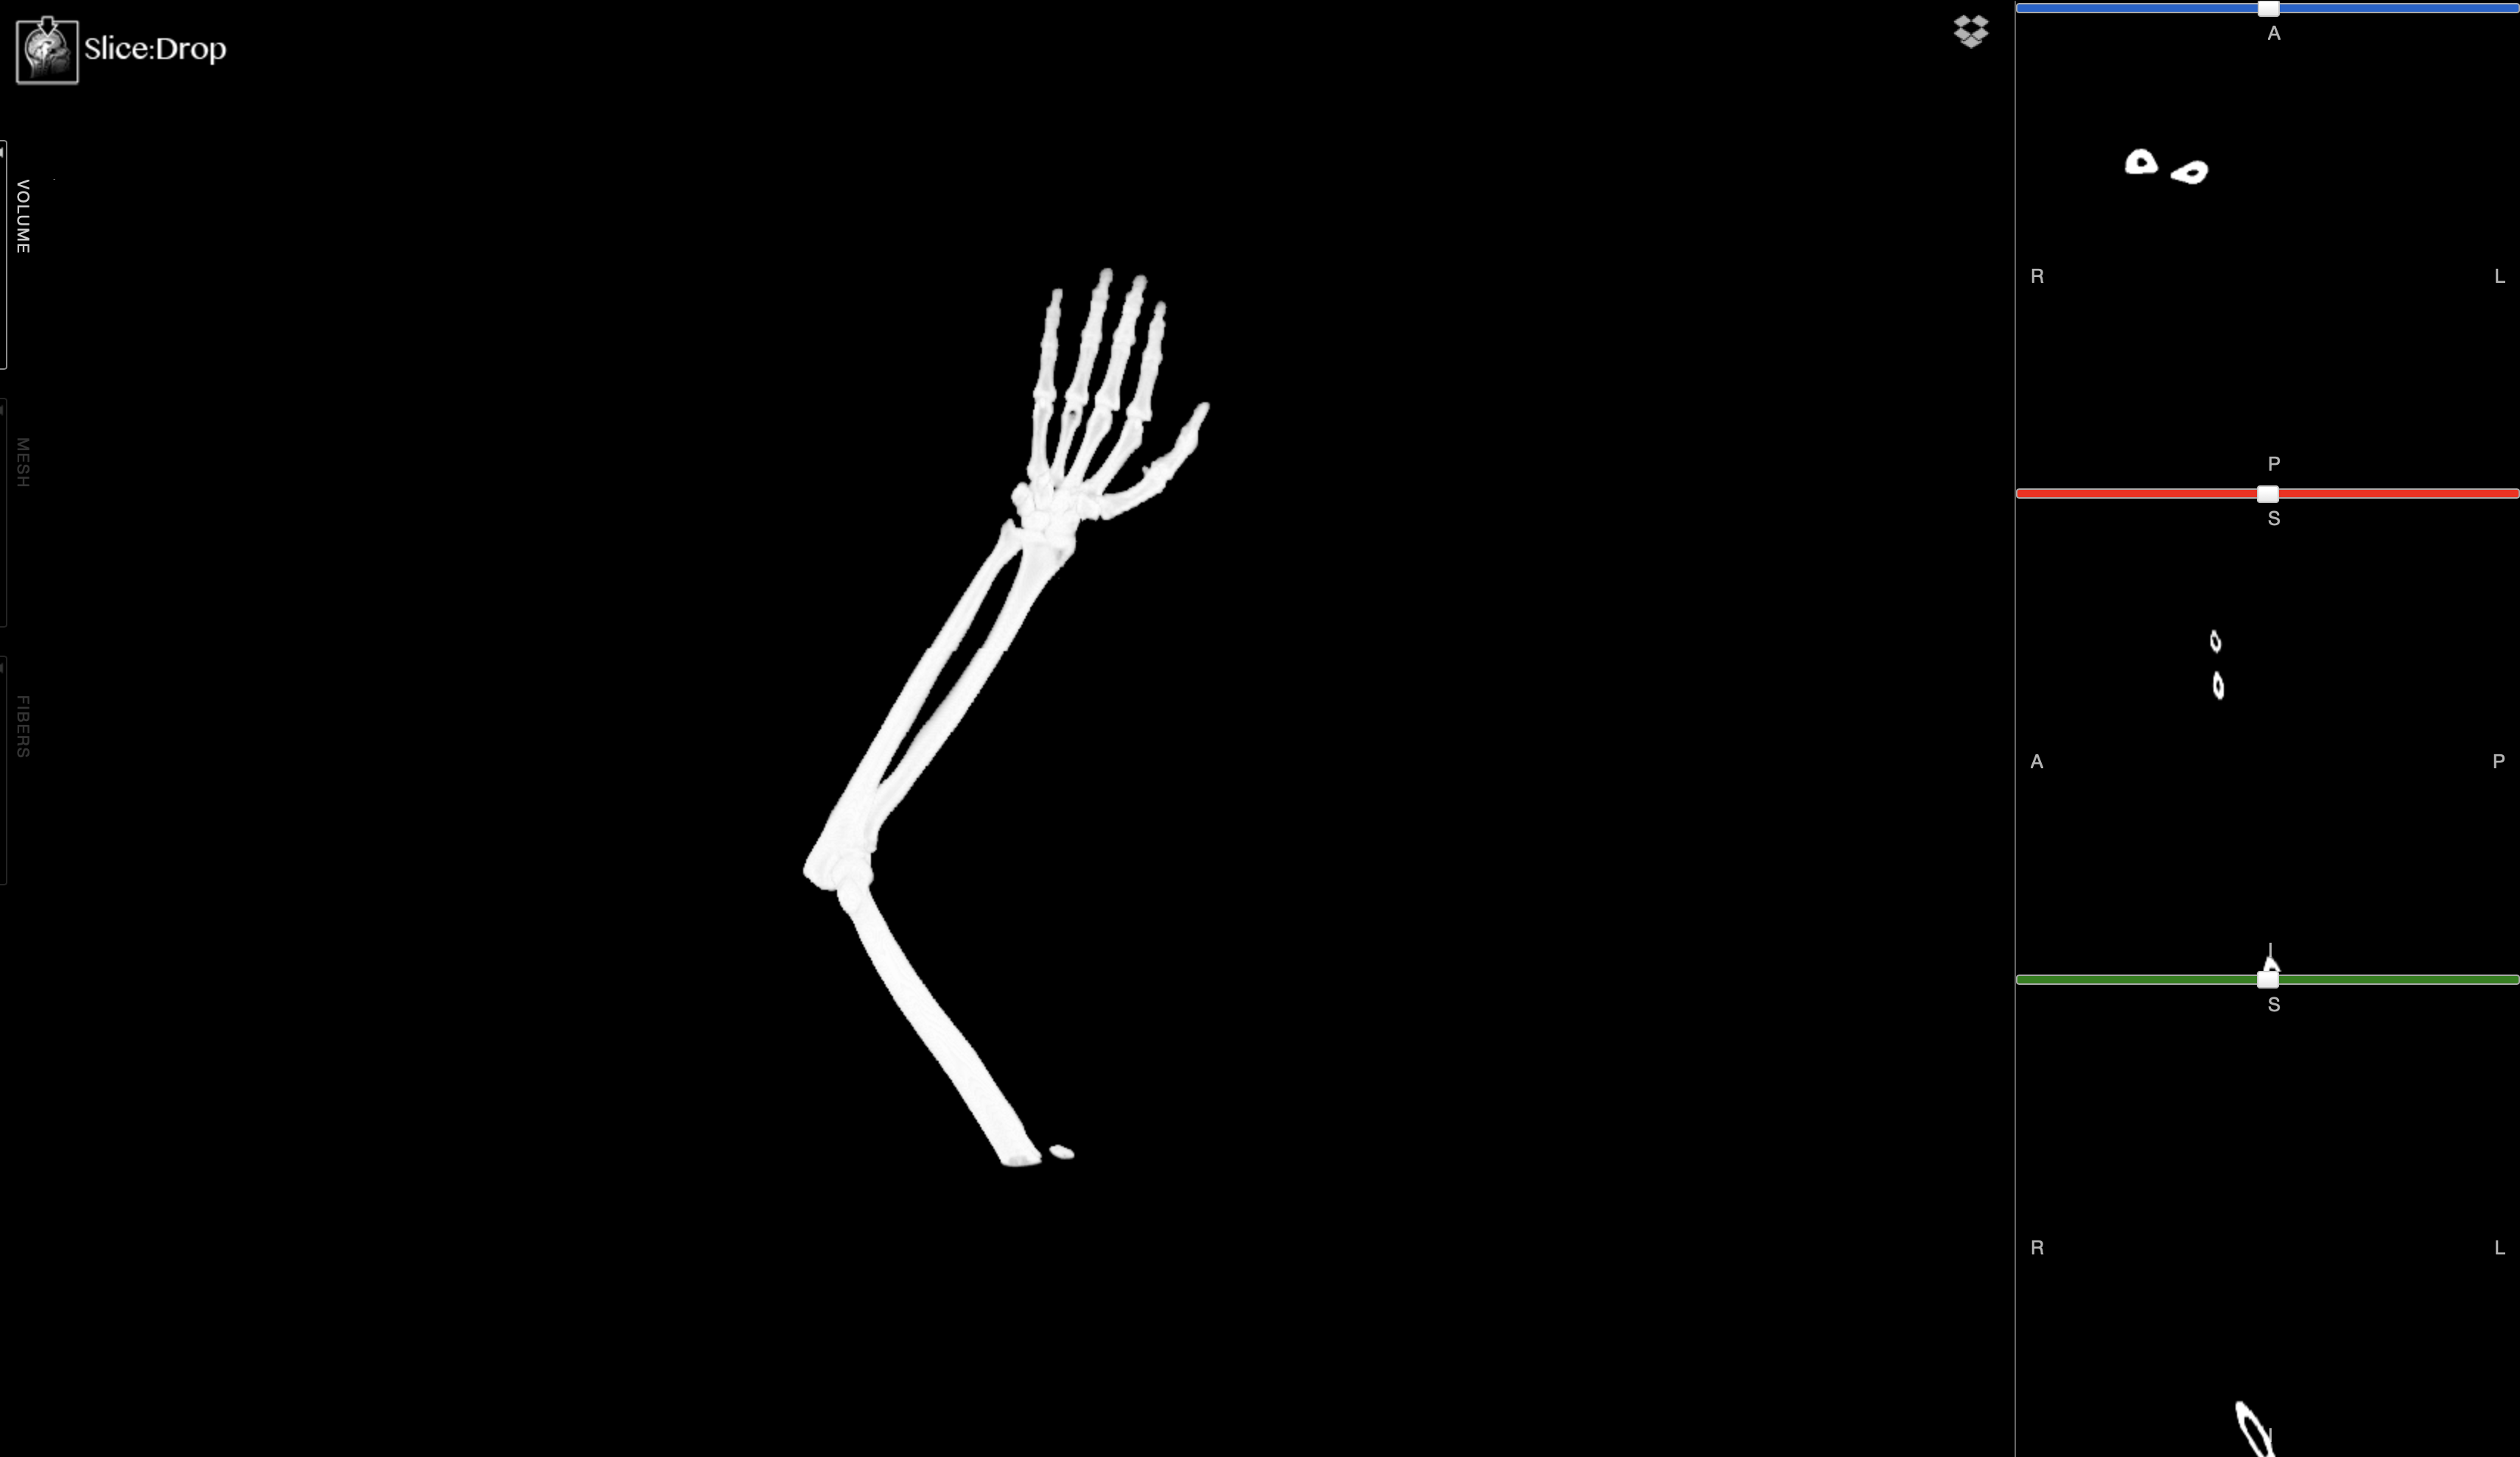

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [16]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [17]:
from pydicom import dcmread

In [21]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

import os

directory = "/content/ct"
dicom_files = [file for file in os.listdir(directory) if file.endswith('.dcm')]
dicom_files.sort()

first_dcm = dcmread(os.path.join(directory, dicom_files[0]))
rows = first_dcm.Rows
cols = first_dcm.Columns
num_slices = len(dicom_files)

ct_volume = np.zeros((rows, cols, num_slices), dtype=np.int16)

for i, file in enumerate(dicom_files):
    dcm = dcmread(os.path.join(directory, file))
    ct_volume[:, :, i] = dcm.pixel_array

print(f"Shape of CT volume: {ct_volume.shape}")

Shape of CT volume: (454, 512, 220)


In [22]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

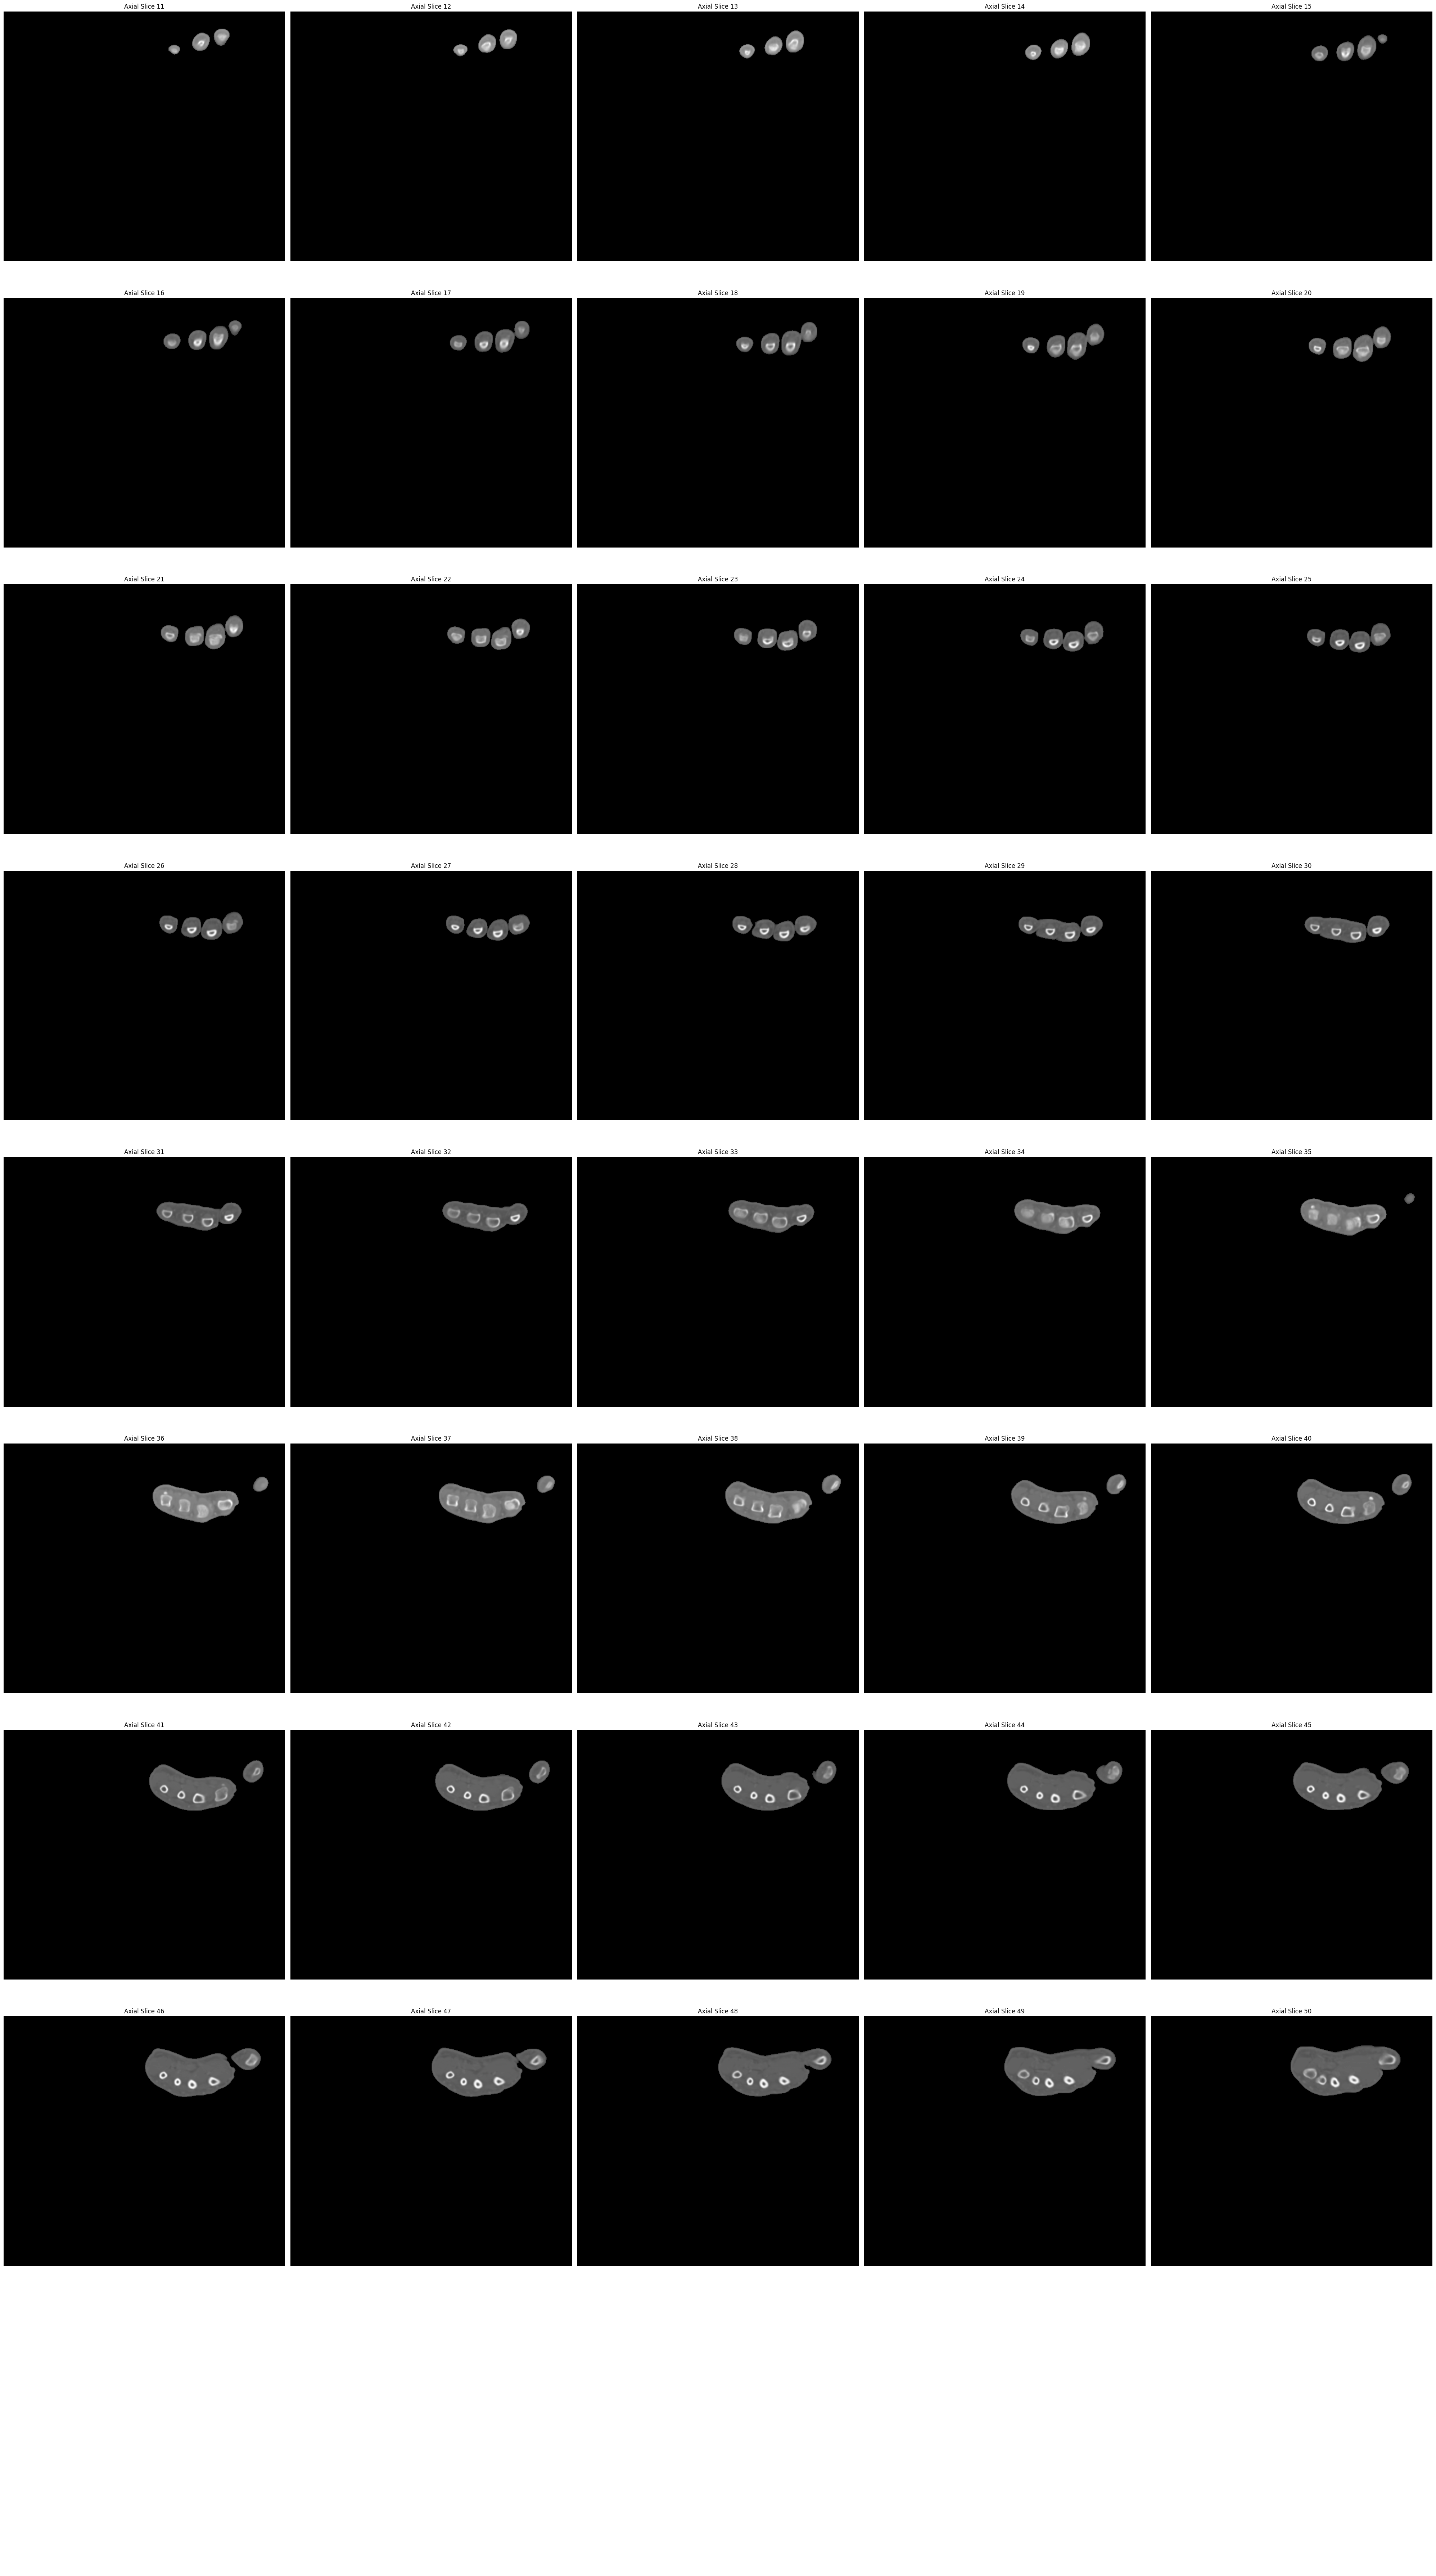

In [50]:
# TODO: YOUR CODE FOR AXIAL

def show_axial_slices(volume, start_slice=100, end_slice=200, num_slices_per_row=5, figsize_per_slice=(8, 8)):
    start_slice = max(0, start_slice)
    end_slice = min(volume.shape[2], end_slice)

    num_slices_to_display = end_slice - start_slice
    num_slices_per_row = min(num_slices_per_row, num_slices_to_display)

    num_rows = (num_slices_to_display // num_slices_per_row) + 1

    fig, axes = plt.subplots(num_rows, num_slices_per_row, figsize=(figsize_per_slice[0] * num_slices_per_row, figsize_per_slice[1] * num_rows))

    for i in range(num_slices_to_display):
        slice_index = start_slice + i
        row_index = i // num_slices_per_row
        col_index = i % num_slices_per_row
        ax = axes[row_index, col_index]
        ax.imshow(volume[:, :, slice_index], cmap='gray')
        ax.axis('off')
        ax.set_title(f"Axial Slice {slice_index + 1}")

    for j in range(num_slices_to_display, num_rows * num_slices_per_row):
        row_index = j // num_slices_per_row
        col_index = j % num_slices_per_row
        axes[row_index, col_index].axis('off')

    plt.tight_layout()
    plt.show()

show_axial_slices(ct_volume, start_slice=10, end_slice=50, num_slices_per_row=5, figsize_per_slice=(8, 8))


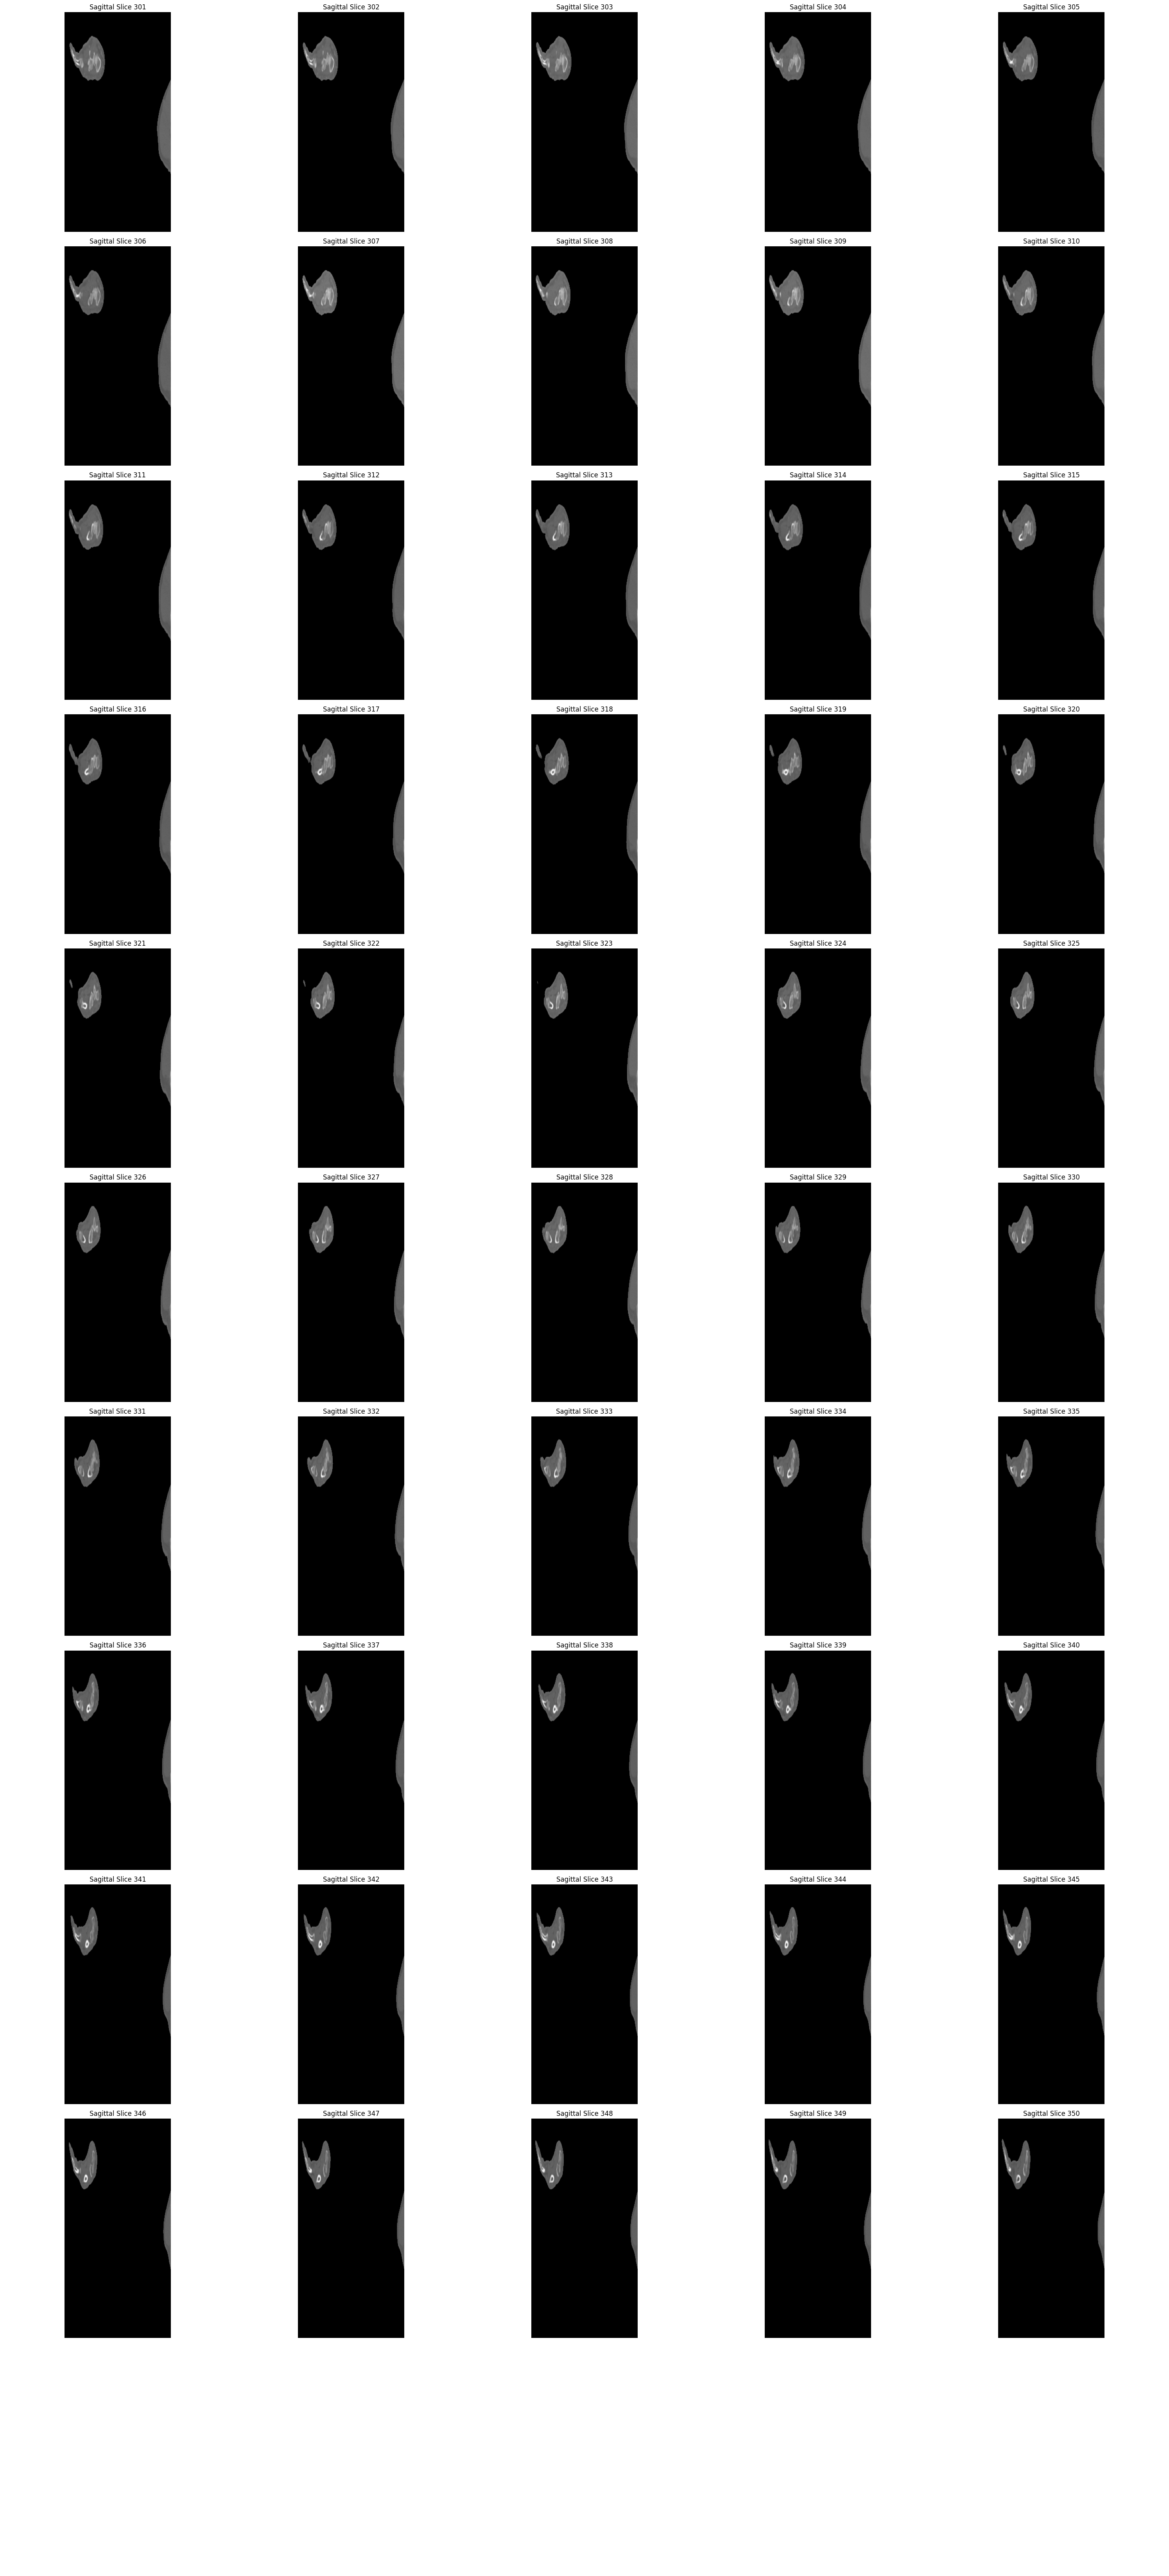

In [51]:
# TODO: YOUR CODE FOR SAGITTAL

def show_sagittal_slices(volume, start_slice=0, end_slice=None, num_slices_per_row=5, figsize_per_slice=(6, 6)):
    num_slices = volume.shape[1]

    if end_slice is None or end_slice > num_slices:
        end_slice = num_slices

    num_slices_to_display = end_slice - start_slice
    num_rows = (num_slices_to_display // num_slices_per_row) + 1

    fig, axes = plt.subplots(num_rows, num_slices_per_row, figsize=(figsize_per_slice[0] * num_slices_per_row, figsize_per_slice[1] * num_rows))

    for i in range(num_slices_to_display):
        slice_index = start_slice + i
        row_index = i // num_slices_per_row
        col_index = i % num_slices_per_row
        ax = axes[row_index, col_index]
        ax.imshow(volume[:, slice_index, :], cmap='gray')
        ax.axis('off')
        ax.set_title(f"Sagittal Slice {slice_index + 1}")

    for j in range(num_slices_to_display, num_rows * num_slices_per_row):
        row_index = j // num_slices_per_row
        col_index = j % num_slices_per_row
        axes[row_index, col_index].axis('off')

    plt.tight_layout()
    plt.show()

show_sagittal_slices(ct_volume, start_slice=300, end_slice=350, num_slices_per_row=5, figsize_per_slice=(6, 6))



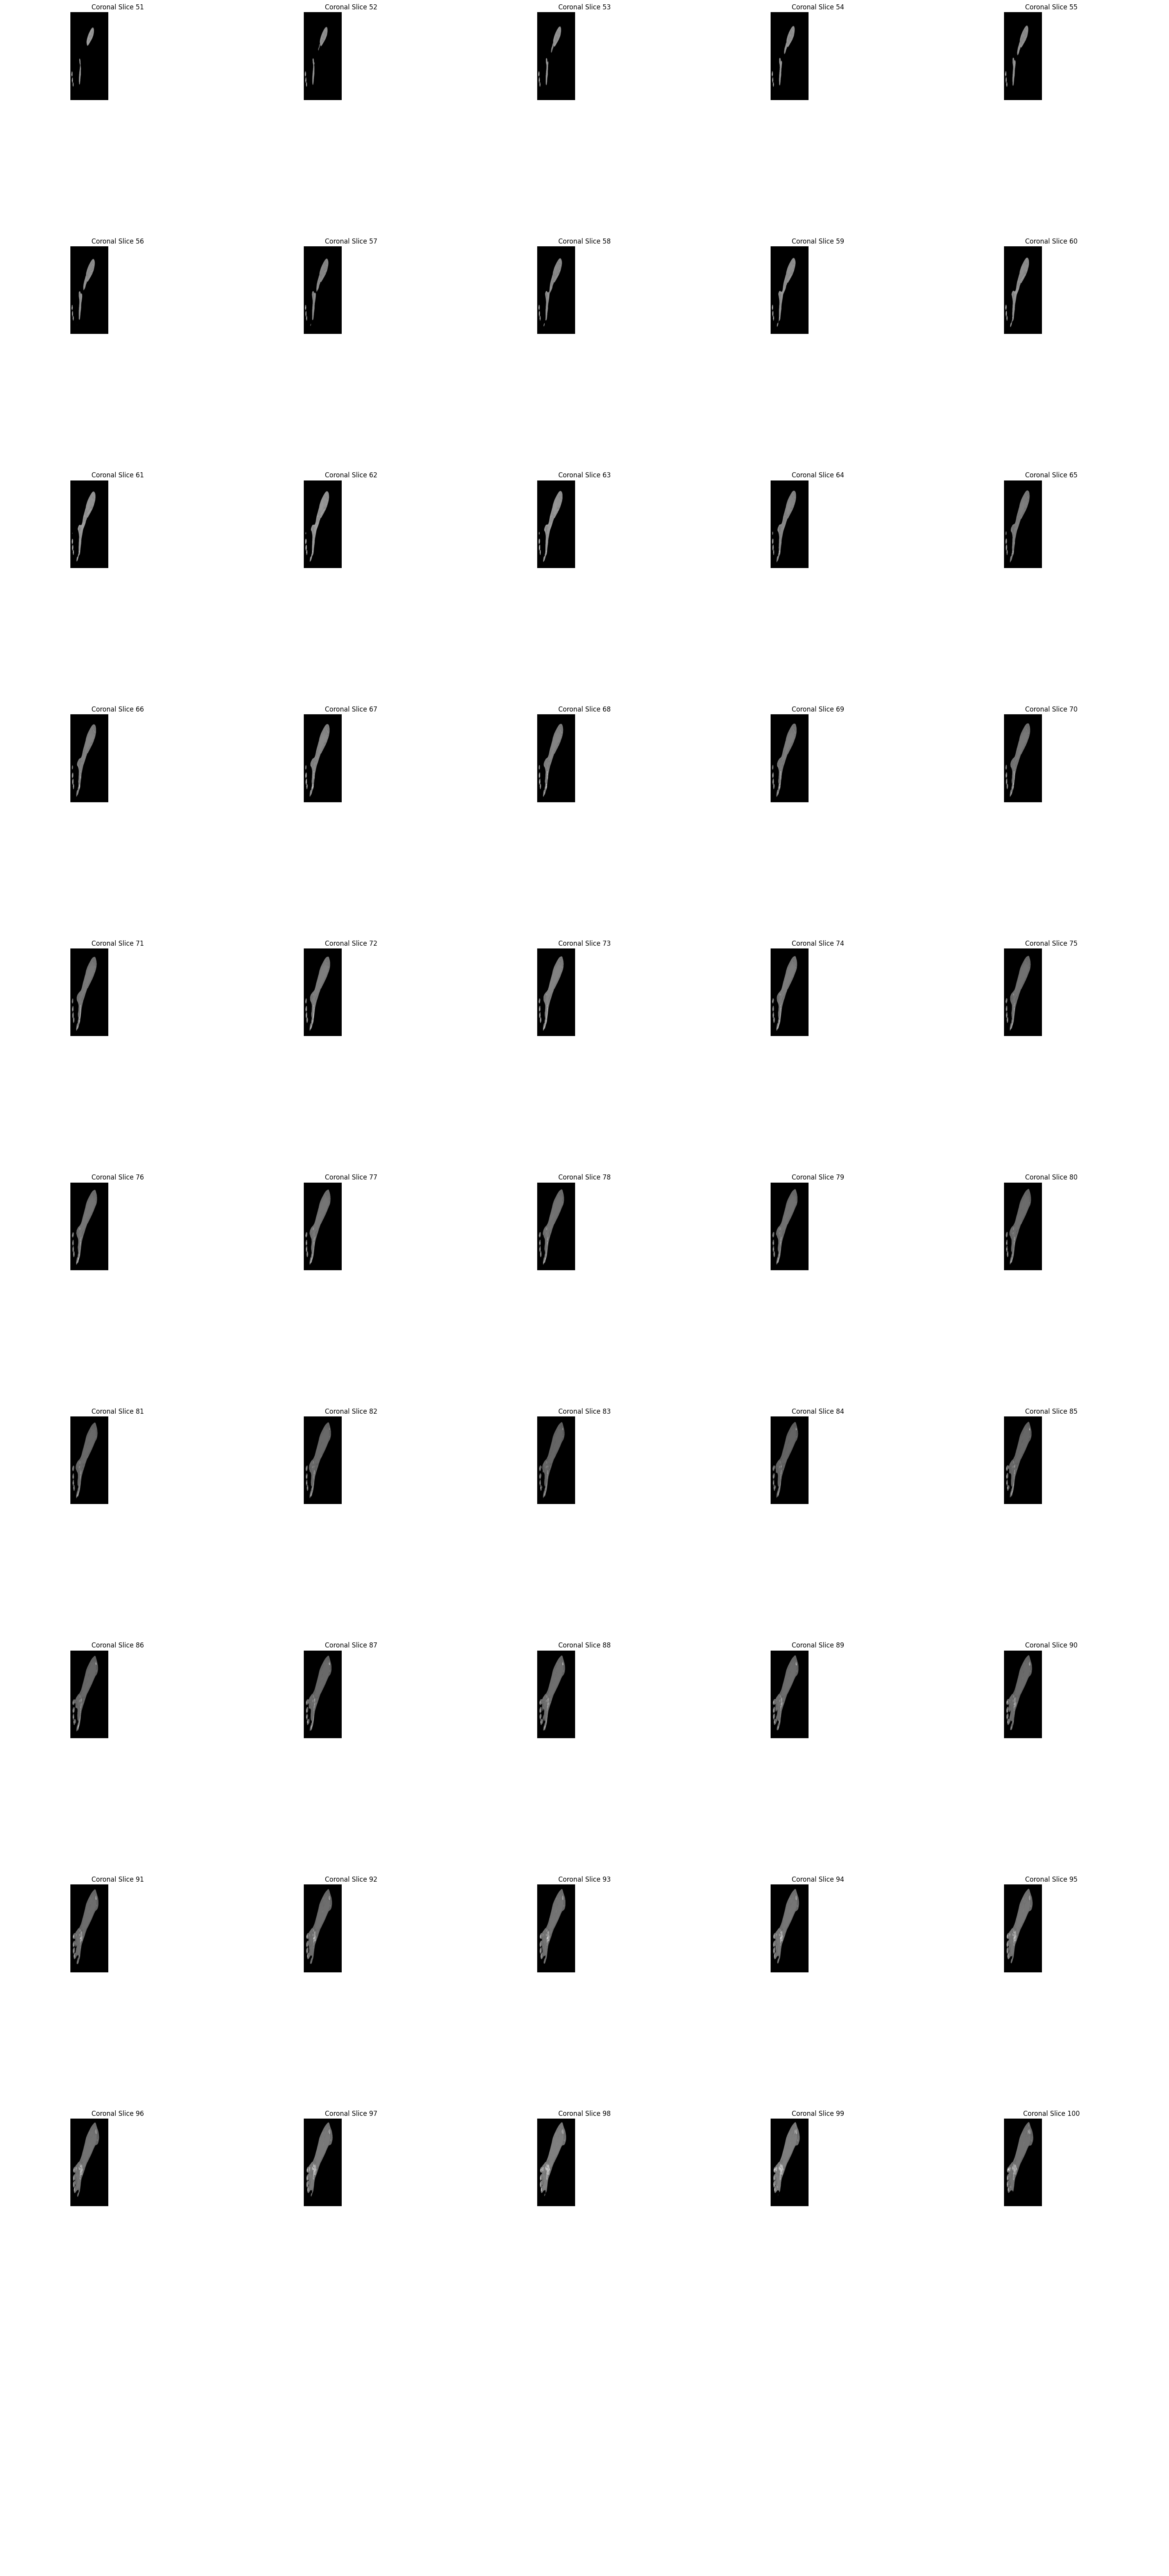

In [52]:
# TODO: YOUR CODE FOR CORONAL

def show_coronal_slices(volume, start_slice=0, end_slice=None, num_slices_per_row=4, figsize_per_slice=(6, 6), scale_factor=2.5):
    num_slices = volume.shape[0]

    if end_slice is None or end_slice > num_slices:
        end_slice = num_slices

    num_slices_to_display = end_slice - start_slice
    num_rows = (num_slices_to_display // num_slices_per_row) + 1

    fig, axes = plt.subplots(num_rows, num_slices_per_row, figsize=(figsize_per_slice[0] * num_slices_per_row, figsize_per_slice[1] * num_rows))

    for i in range(num_slices_to_display):
        slice_index = start_slice + i
        row_index = i // num_slices_per_row
        col_index = i % num_slices_per_row
        ax = axes[row_index, col_index]
        ax.imshow(volume[slice_index, :, :], cmap='gray')
        ax.set_title(f"Coronal Slice {slice_index + 1}")
        ax.axis('off')
        ax.set_xlim([0, volume.shape[2] * scale_factor])
        ax.set_ylim([volume.shape[1] * scale_factor, 0])

    for j in range(num_slices_to_display, num_rows * num_slices_per_row):
        row_index = j // num_slices_per_row
        col_index = j % num_slices_per_row
        axes[row_index, col_index].axis('off')

    plt.tight_layout()
    plt.show()

show_coronal_slices(ct_volume, start_slice=50, end_slice=100, num_slices_per_row=5, figsize_per_slice=(6, 6), scale_factor=2.5)


**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [26]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [27]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

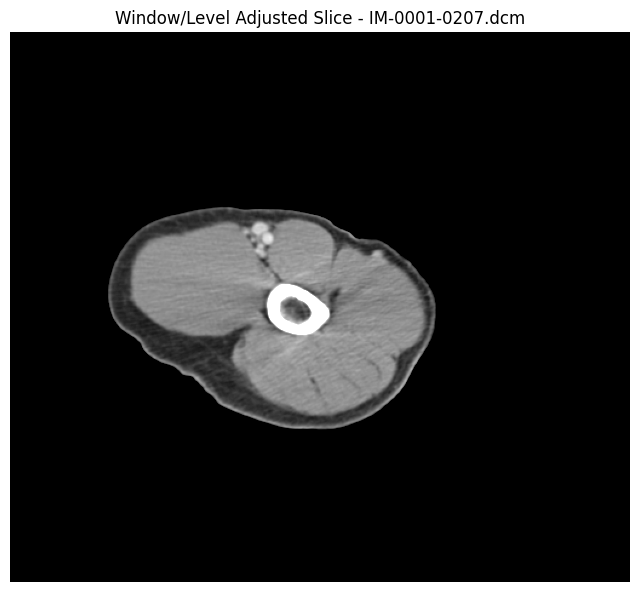

Window Center: 30
Window Width: 410
Rescale Intercept: -1024


In [28]:
# TODO: YOUR CODE

def visualize_slice_with_window_level(dicom_path):
    try:
        ds = dcmread(dicom_path)
        window_center = ds[(0x0028, 0x1050)].value
        window_width = ds[(0x0028, 0x1051)].value
        rescale_intercept = ds.get((0x0028, 0x1052), 0).value

        hu_pixels = ds.pixel_array.astype(np.float32) * ds.RescaleSlope + rescale_intercept

        vmin = window_center - window_width / 2
        vmax = window_center + window_width / 2

        plt.figure(figsize=(8, 8))
        plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
        plt.title(f"Window/Level Adjusted Slice - {os.path.basename(dicom_path)}")
        plt.axis('off')
        plt.show()

        print(f"Window Center: {window_center}")
        print(f"Window Width: {window_width}")
        print(f"Rescale Intercept: {rescale_intercept}")

    except Exception as e:
        print(f"Error occurred while visualizing slice: {e}")

dicom_directory = '/content/ct'

dicom_file_to_visualize = 'IM-0001-0207.dcm'
dicom_path = os.path.join(dicom_directory, dicom_file_to_visualize)

visualize_slice_with_window_level(dicom_path)


In [29]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

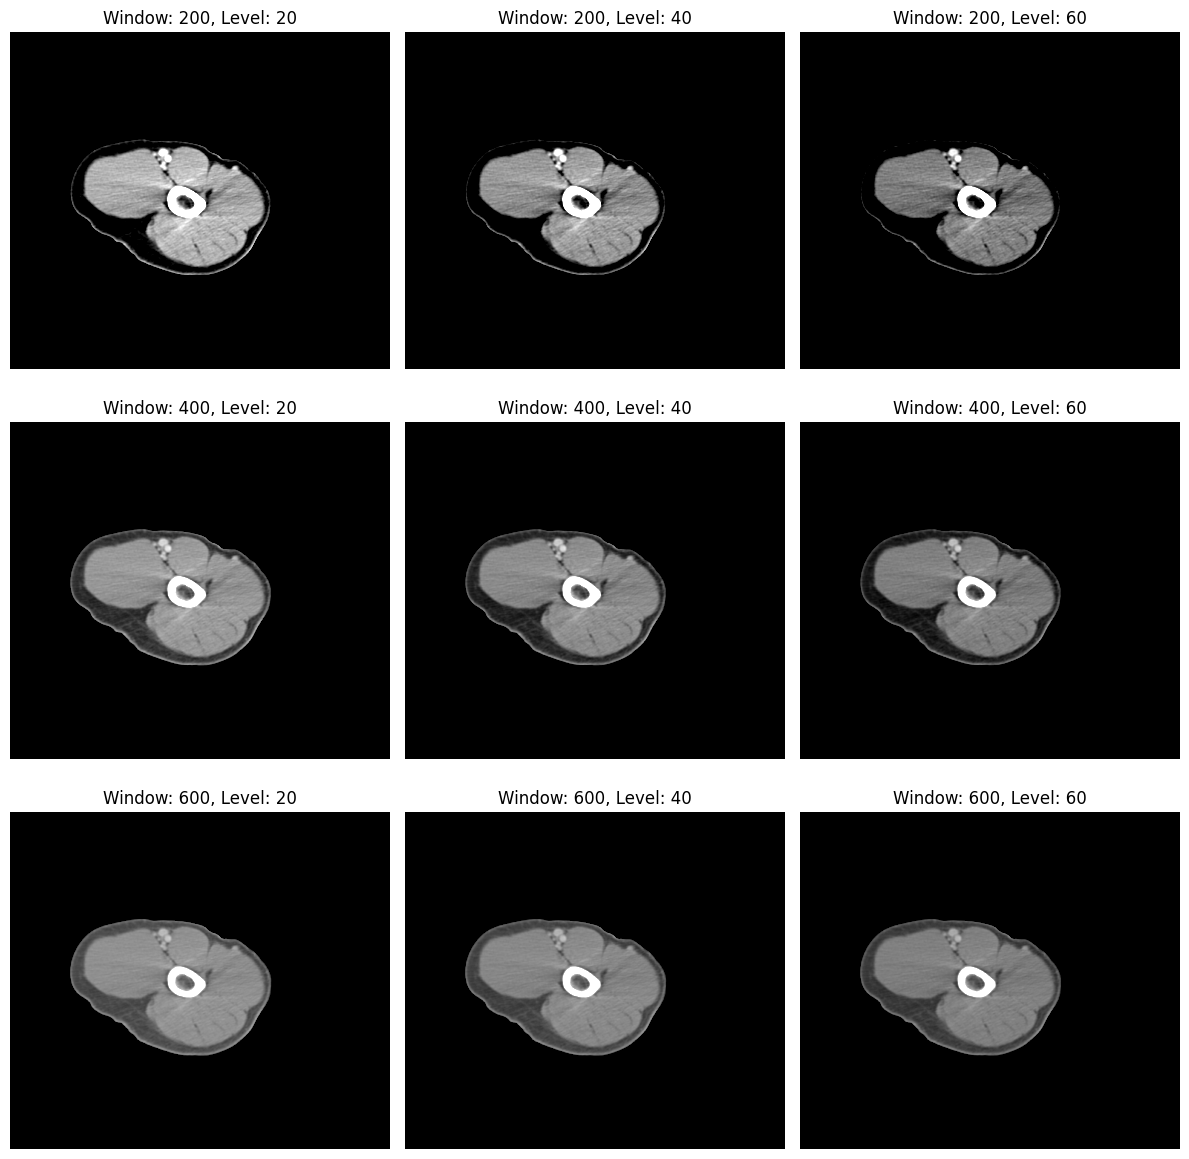

In [30]:
# TODO: YOUR CODE

def visualize_slice_with_window_level(dicom_path, window_values, level_values):

    ds = dcmread(dicom_path)

    rescale_slope = ds.get('RescaleSlope', 1.0)
    rescale_intercept = ds.get('RescaleIntercept', 0.0)
    hu_pixels = ds.pixel_array.astype(float32) * rescale_slope + rescale_intercept

    num_rows = len(window_values)
    num_cols = len(level_values)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows))

    for i, window in enumerate(window_values):
        for j, level in enumerate(level_values):
            vmin = level - window / 2
            vmax = level + window / 2

            ax = axes[i, j]
            ax.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)
            ax.set_title(f"Window: {window}, Level: {level}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()


dicom_directory = '/content/ct'

dicom_file_to_visualize = 'IM-0001-0207.dcm'
dicom_path = os.path.join(dicom_directory, dicom_file_to_visualize)

window_values = [200, 400, 600]
level_values = [20, 40, 60]

visualize_slice_with_window_level(dicom_path, window_values, level_values)


In [31]:
# Which values make sense and why?

In [32]:
# TODO: YOUR ANSWER

In [33]:
# Window center (W/C) values (200, 400, 600) might correspond to visualizing different tissue types with distinct HU ranges.
# Window level (W/L) values (20, 40, 60) control the displayed intensity range around each window center. Higher values show a wider range, while lower values focus on a narrower range.
# I think window centre = 400 and window level = 40 makes sense. Because the contrast is just right to see the structure clearly.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [34]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

Fat Mask Shape: (454, 512)


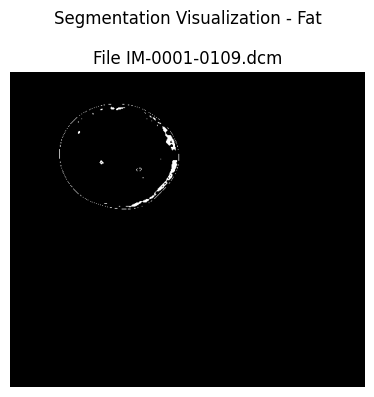

Soft Tissue Mask Shape: (454, 512)


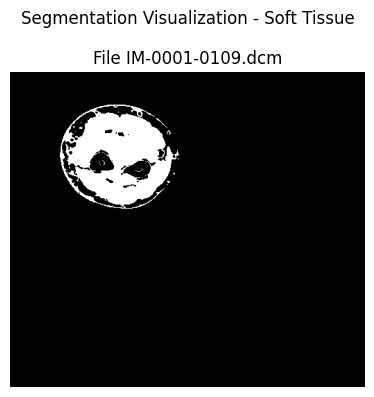

Bones Mask Shape: (454, 512)


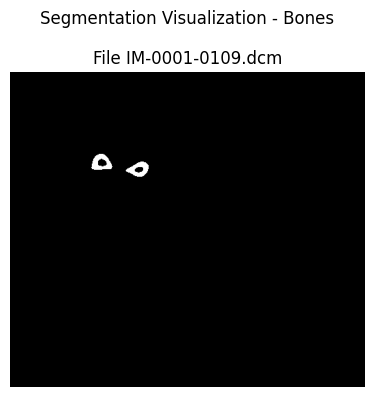

Fat Mask Shape: (454, 512)


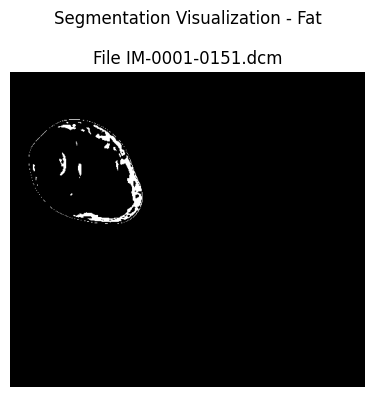

Soft Tissue Mask Shape: (454, 512)


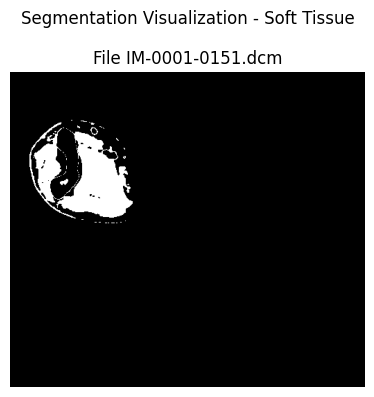

Bones Mask Shape: (454, 512)


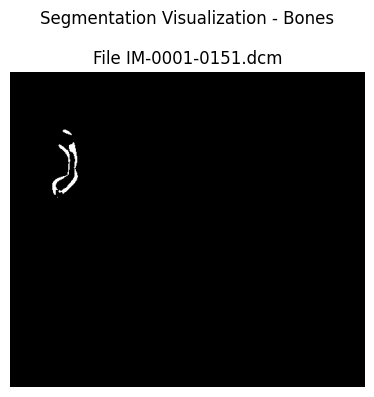

Fat Mask Shape: (454, 512)


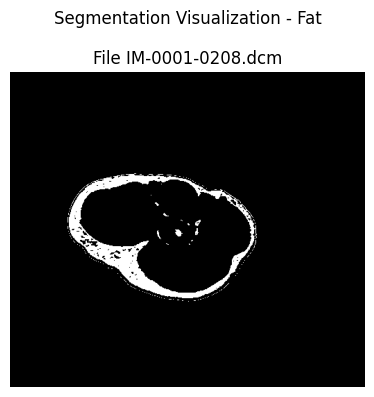

Soft Tissue Mask Shape: (454, 512)


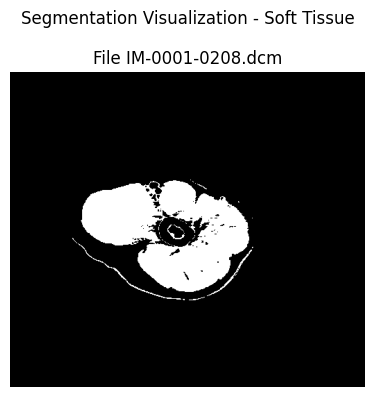

Bones Mask Shape: (454, 512)


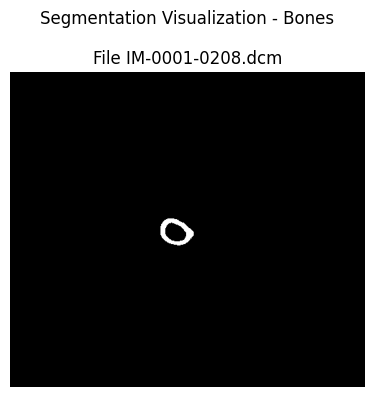

In [40]:
# TODO: YOUR CODE TO SEGMENT FAT, SOFT TISSUE AND BONES

def create_segmentation_masks(dicom_path):
    try:
        ds = dcmread(dicom_path)
        hu_pixels = ds.pixel_array.astype(np.float32) * ds.RescaleSlope + ds.RescaleIntercept

        fat_min = -120
        fat_max = -50
        soft_tissue_min = 20
        soft_tissue_max = 100
        bone_min = 700
        bone_max = 3000

        fat_mask = ((hu_pixels >= fat_min) & (hu_pixels <= fat_max)).astype(np.int16)
        soft_tissue_mask = ((hu_pixels >= soft_tissue_min) & (hu_pixels <= soft_tissue_max)).astype(np.int16)
        bone_mask = ((hu_pixels >= bone_min) & (hu_pixels <= bone_max)).astype(np.int16)

        return fat_mask, soft_tissue_mask, bone_mask

    except Exception as e:
        print(f"Error occurred while creating segmentation masks: {e}")
        return None, None, None

def visualize_segmentation_masks(segmentation_masks, dicom_file):
    try:
        for structure, mask in zip(['Fat', 'Soft Tissue', 'Bones'], segmentation_masks):
            print(f"{structure} Mask Shape:", mask.shape)

            num_slices = mask.shape[2] if len(mask.shape) == 3 else 1

            plt.figure(figsize=(12, 4))
            plt.suptitle(f"Segmentation Visualization - {structure}")

            for i in range(num_slices):
                slice_data = mask[:, :, i] if num_slices > 1 else mask
                plt.subplot(1, num_slices, i + 1)
                plt.imshow(slice_data, cmap='gray')
                plt.title(f"File {dicom_file}")
                plt.axis('off')

            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Error occurred while visualizing segmentation masks: {e}")

dicom_directory = '/content/ct'

dicom_files_to_segment = [
    'IM-0001-0109.dcm',
    'IM-0001-0151.dcm',
    'IM-0001-0208.dcm'
]

for dicom_file in dicom_files_to_segment:
    dicom_path = os.path.join(dicom_directory, dicom_file)
    fat_mask, soft_tissue_mask, bone_mask = create_segmentation_masks(dicom_path)
    segmentation_masks = [fat_mask, soft_tissue_mask, bone_mask]

    visualize_segmentation_masks(segmentation_masks, dicom_file)


In [36]:
# Are the segmentations good?

In [41]:
# TODO: Segmentations are that great. Segmentation of bones is acceptable, but segmentation of fat and soft tissue is clumsy.

In [38]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""